# Module 2 – End-to-end Machine Learning project (part 1)

This material is adapted from the book Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow by Geron Aurelien.


## Overview

In this module we will work through an example machine learning project end to end.  This will give us an opportunity to get an overview of all the steps that are involved.

Specifically, we will:

1. Look at the big picture
2. Get the data
3. Visualize the data to gain insights
4. Prepare the data
5. Select a model and train it
6. Fine-tune the model
7. Present the solution


## 1. Look at the big picture

In this project, we will use US Census Bureau data to build a model of housing prices in California.  The dataset includes information about the population, median income, and median housing price for Census Bureau "block groups" (around 600 to 3000 people).  We will call these "districts".

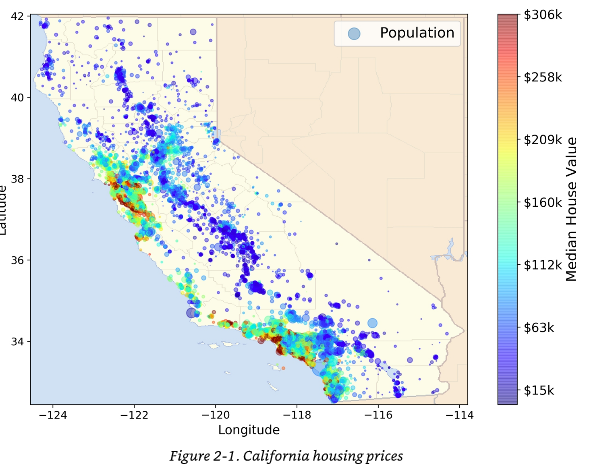


### Understand the problem
* Before diving in and building a model, we should find out what the business objective(s) are
* Knowing how the company intends to use the model will help us make important decisions about how to frame the problem, what algorithms may work best, and what performace measure to use to evaluate the model.


### Info from your boss
* The system you implement will be used as a factor to help determine whether to invest in an area or not.
* This is very important to the company's revenue.
* Currently, district housing prices are estimated by a team of experts.
* Their estimates are often off by 20% or more.


### Think
* Supervised, unsupervised, or reinforcement learning?
    * supervised since we have labelled training data
* Classification, regression, or something else?
    * multiple regression (regression using multiple features)
    * also, univariate regression (predicting a single value for each district)


### Select a performance measure
* For regression problems, Root Mean Square Error (RMSE) is a commonly used measure
    * Gives a higher weight to large errors
    
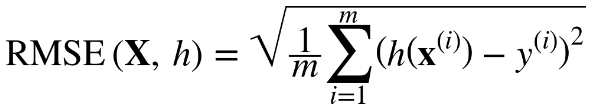

* m is the number of instances in our dataset
* x<sup>(i)</sup> is a vector of all the feature values of the i<sup>th</sup> instance
* For example, 

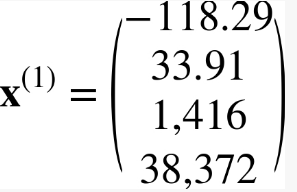

and

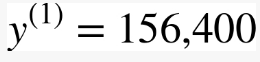


* **X** is a matrix containing all the feature values (excluding labels) of all instances in the dataset

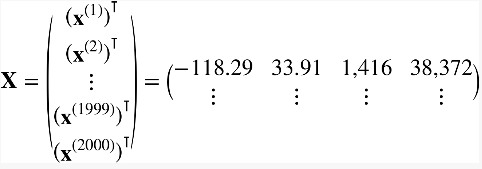


* *h* is the prediction function

* Given an instance's feature vector $x^{(i)}$, it outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$ (pronounced "y-hat")




## 2. Get the Data

Make sure you have the housing.csv file downloaded from the class website and placed in the same folder as this Jupyter notebook.


## Take a Quick Look at the Data Structure

First, we will take a look at the first few rows of data using .head() on the DataFrame.

Some things to notice:
* Each row represents an entire **district**
    * The total_rooms column shows the total number of rooms in all the houses in that district
    * The number of households is the total number of households in the district.

In [1]:
import pandas as pd

housing = pd.read_csv("../data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



We can get information about the DataFrame using .info()

* There are 20640 districts (rows) in this dataset
* Notice that all the data is float64 execpt ocean_proximity which is type object (in this set, they will be strings)
* Also notice that total_bedrooms only has 20433 non-null values -- 207 districts are missing this feature

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can look at the distinct values (and counts) for the ocean_proximity feature:

In [30]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can also look at some general statistics on the whole dataset by using .describe():


In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



It is always a good idea to look at plots/graphs of the data to gain insights.

* Below, we will use matplotlib to create histograms
    * %matplotlib inline     is a "magic" Jupyter command that tells it to display the plots inline in the notebook

* Histograms show how many instances (y-axis) have a particular value (x-axis)
    

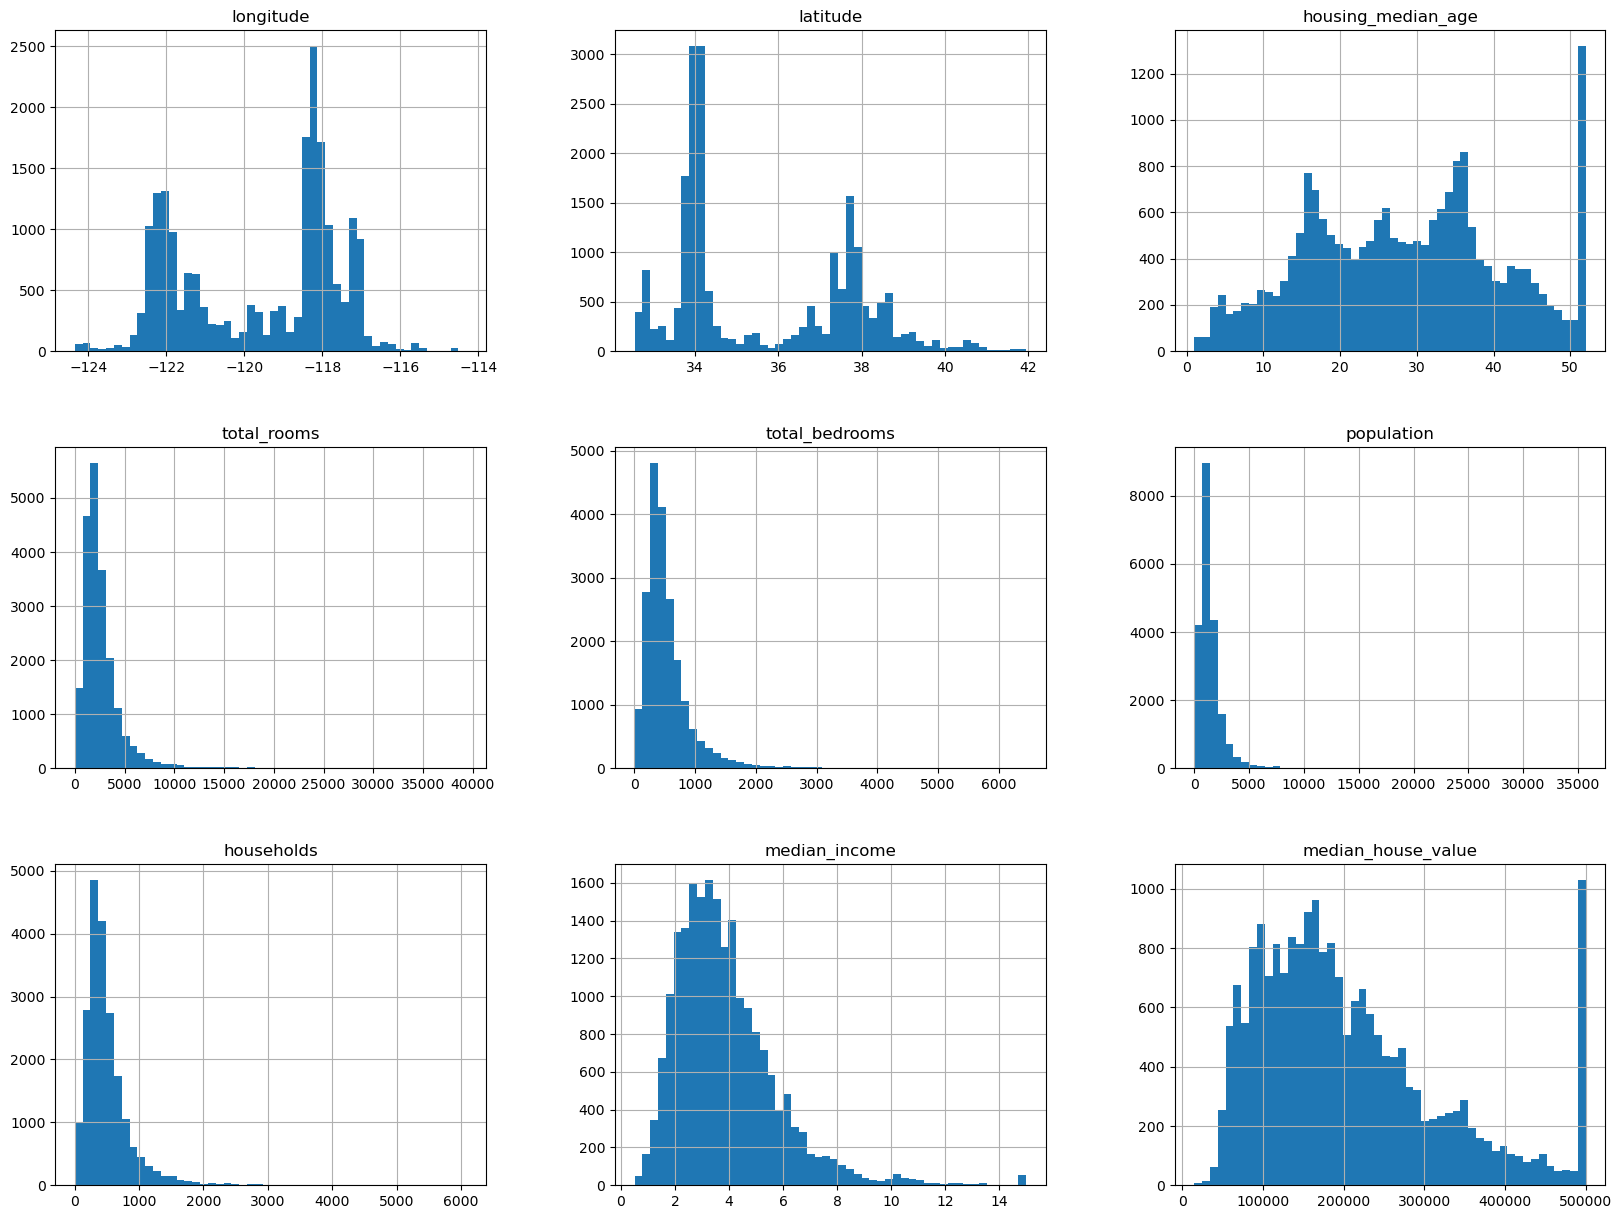

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In these histograms, notice:

* Housing median age has been capped


* Median house value has been capped
    * This may be a serious problem since we are predicting this value
    * We may need to collect the correct data
    * Or remove the capped districts


* Median income is not in USD -- it has been scaled
    * In this case, the numbers are roughly 10k (e.g. 3 = 30k)
    * It has also been capped at about 15


* The attributes have very different scales
    * We will address this later
    * Many histograms show a tail-heavy distribution
        * This presents a challenge for some ML algs
        * We may need to transform these to more normal distributions later
 

## Create a Test Set

#### IMPORTANT
Before we look at the data in too much detail, we **must** now set aside part of the data as a test set.  After we have set aside the test set, we should not look at the test set data again.  By looking at the test set, we might unconsciously overfit our model due to *data snooping* bais.


To create our test set, we will randomly select 20% of the instances in the dataset and set them aside.

In [33]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [34]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [35]:
len(test_set)

4128

### A potential problem

A problem with the above approach is that if you run it several times, you will end up creating different test sets because the random permutation will be different each time.

One solution is to set the random number generator's seed to a fixed value so that it will always generate the same shuffled sequence.

Another solution is to save the test set after the first run and then load it for subseqent runs (without ever changing it in-between).


In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

However, both these approaches will not work if you ever need to download an updated version of the dataset.

An alternative is to use each instance's unique identifier to determine if it should be in test set.

For example, we could combine the latitude and longitude values to create a unique identifier for each district.
Then, we could select 20% based on this identifer.

The textbook has more details about this.

For now, we will use the approach of setting the random number seed.
Just keep in mind that you need to be very careful.


### Built-in functions for splitting datasets

Scikit-learn has built-in functions for splitting datasets into testing and training sets.

Below, we will use the train_test_split function.
* random_state=42 sets the random number generator seed to 42.


In [36]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [37]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### Stratified sampling

For a large dataset, completely random may work fine.

However, for smaller datasets, random sampling could lead to a skewed dataset.

A common approach is to use stratified sampling to help guarantee that the test set is representative of the overall dataset.

Suppose we want to create strata based on median income (experts have told us this is an important attribute).

The histogram of median income shows that most values are between 1.5 to 6.

<Axes: >

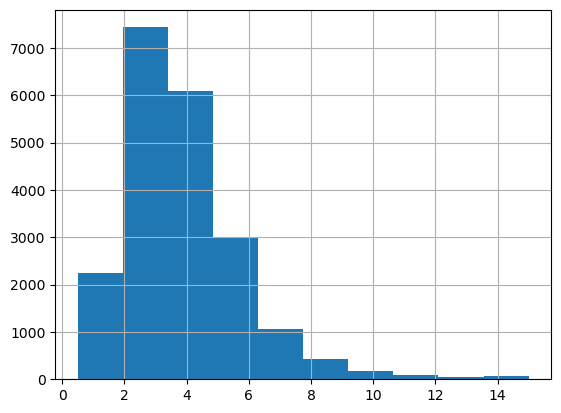

In [38]:
housing["median_income"].hist()

We can use the DataFrame function .cut() to create a new attribute called "income_cat" that categorizes the median income into five categories.

In [39]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [40]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

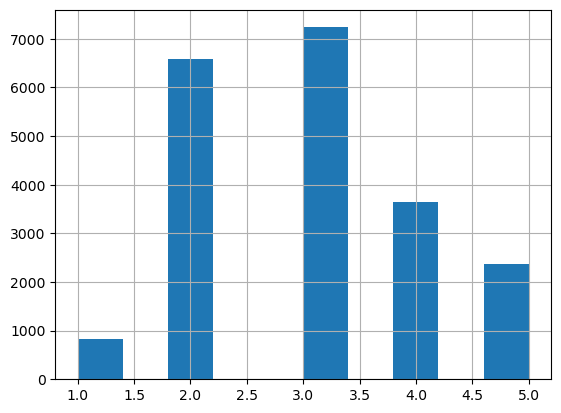

In [41]:
housing["income_cat"].hist()

### Stratified Shuffle Split

Now that we have the income_cat, we can use scikit-learn's StratifiedShuffleSplit class to do stratified sampling.


#### First, a look at how StratifiedShuffleSplit works

The first time I looked at StratifiedShuffleSplit, I had a bit of difficulty understanding how it worked.

This the page and example below from the scikit-learn documentation helped me:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

Note that StatifiedShuffleSplit is a class that we must instantiate and then call its .split() function.


In [42]:
# adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [8,8]])
y = np.array([0, 0, 1, 1, 1, 1, 1, 1])
# also try
#y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

print(sss)
print()

# Note that y is used to generate the splits
# X is not really needed; we could use np.zeros(n_samples) instead of X
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print ("    y_train =", y_train, "    y_test =", y_test)
    print ()


StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)

TRAIN: [3 1 4 6] TEST: [5 0 2 7]
    y_train = [1 0 1 1]     y_test = [1 0 1 1]

TRAIN: [2 1 5 7] TEST: [0 4 6 3]
    y_train = [1 0 1 1]     y_test = [0 1 1 1]

TRAIN: [0 5 6 4] TEST: [7 3 1 2]
    y_train = [0 1 1 1]     y_test = [1 1 0 1]

TRAIN: [0 7 4 6] TEST: [2 3 5 1]
    y_train = [0 1 1 1]     y_test = [1 1 1 0]

TRAIN: [5 6 0 3] TEST: [7 4 2 1]
    y_train = [1 1 0 1]     y_test = [1 1 1 0]



#### Now we can use StratifiedShuffleSplit with our dataset

* n_splits=1 means that we wish to generate only 1 split
* Since we want to stratify based on the income_cat, we use it in our call to sss.split()

* As we have seen, StratifiedShuffleSplit can be used to generate more than one split
* We can then iterate over the splits (again, in this case there is only one)

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [44]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [45]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### Drop the income_cat attribute

We now should drop the income_cat attribute so that the data is back to its original state.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
strat_test_set.head()

# Discover and Visualize the Data to Gain Insights

Now that we have set aside the test set, we can look more closely at the training set.

We will start by making a copy of it so that we don't worry about changing the actual training set.


In [ ]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Look at Correlations

Since we are trying to predict median_house_value, it may be helpful to look at how the other attributes correlate with it.

To do this, we can use the .corr() method of DataFrames to compute the Pearson's correlation coefficient between all pairs of attributes.

Then, we can look at just the correlations with the (sorted) median_house_value:

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

Pearson's correlation examines how two atrributes change in relation to each other (linearly).
* Correlation coefficients range from -1 to 1.
* For example, we can see that median_house_value and median_income have a 0.687 correlation coefficient.
* This means that median_income tends to rise when median_house_value rises.

Negative correlation means that the two attributes tend to move in opposite directions.
* For example, latitude has a weak negative correlation with median_house_value.
* This means that districts further north (greater latitude) tend to have slightly lower median_house_values.


#### Illustrations of correlation in various datasets

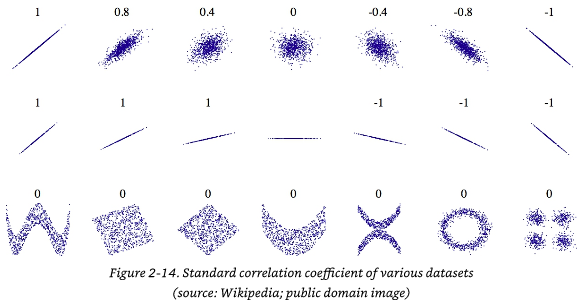




### Closer examination: median_income and median_house_value

Our previous look showed that median_income and median_house_value have a strong positive correlation.

Let's look at this in more detail by creating a scatter plot of these values:

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

The scatter plots shows several interesting (and important) things.

* There is a clear correlation between median_house_value and median_income
* The cap on the house values at 500k is easy to see as a horizontal line
* It looks like there is also a horizontal line around 450k and 350k
    * We may need to explore this further
    * Some districts might have capped their values at 450k and 350k
    * We might want to try removing these capped districts so that our model does not learn these quirks.  We could do this as part of our data cleaning to prepare the data for the ML algorithm.

## Experimenting with Attribute Combinations

Another thing we should notice about the dataset is that several of the attributes are values that are summed across all the houses in a district.

For example, the district at (-121.46, 38.52) has 3873 total rooms and 706 households.

In [ ]:
housing.head()

A more informative attribute might be the number of rooms per household.

We can easily compute a new attribute called rooms_per_household and add it to our data.

Similarly, we might decide that the number of bedrooms per room and the population per household might be useful numbers to use in our model.

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.head()

We can then look at the correlation matrix again with these new attributes:

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

From this, we can see that the new bedrooms_per_room attribute is more correlated (negatively) with median_house_value than many of the other atttributes.

--------------------------------------

# Exercise M2.1

* In this exercise, you will apply concepts covered up to this point in the module.

* This exercise will use the "diabetes" dataset that is packaged as part of scikit-learn.

* Information about the diabetes dataset is at:  https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

* The dataset includes 442 instances (rows), with 11 columns of numeric predictive values.
    * The "bmi" column indicates body-mass-index
    * The "target" column is a quantitative measure of disease progression one year after baseline

* In this exercise, we will imagine that we are trying to predict the target value based on bmi.

* In this exercise, you won't actually create the prediction model.  Instead, you will use scikit-learn's StratifiedShuffleSplit to create stratified training and testing sets based on a category you will create to represent the distribution of the target value.

### What to turn in
* When you are done with steps 1-7 below
* Copy and paste the **CODE** you wrote for steps 1-7 into ONE sequential file
* Go to Canvas --> Assignments --> M2.1
* Upload the file with all your code into the Canvas M2.1 assignment



### 1. Load the dataset and examine the values

* Starting with the given code below, load the dataset and examine first few rows of data.
* Just run this code and review the output.  There is no new code to write for this step.
* For now, we won't worry about any of the other attributes.  We will focus on bmi and target.

In [1]:
#Import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import StratifiedShuffleSplit

# Load the diabetes dataset into a dataframe
diabetes = datasets.load_diabetes(as_frame=True)
diabetes = diabetes.frame
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 2. Create a scatter plot of bmi versus the target value.

* Write code to create the scatter plot.  Your plot should look like the one shown below.

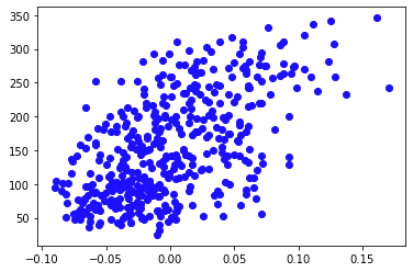


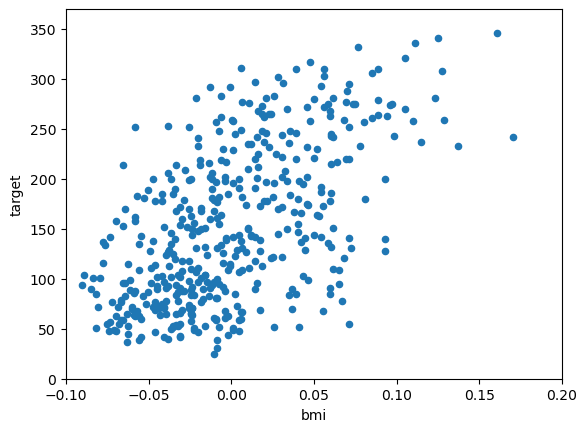

In [15]:
#creating a scatterplot for bmi vs target
diabetes.plot(kind='scatter', x="bmi", y='target')
plt.axis([-0.10,0.20,0,370])   #adjusting the graph scale
plt.show()

### 3. Create a histogram with 4 bins of the target values

* Write one line of code to create the histogram based on the diabetes dataframe.

* Your histgram should look like the one shown below.

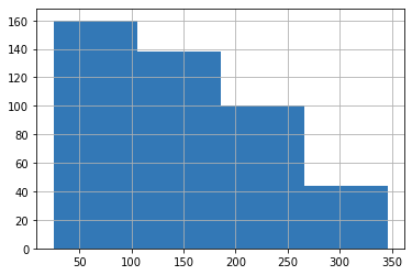


<Axes: >

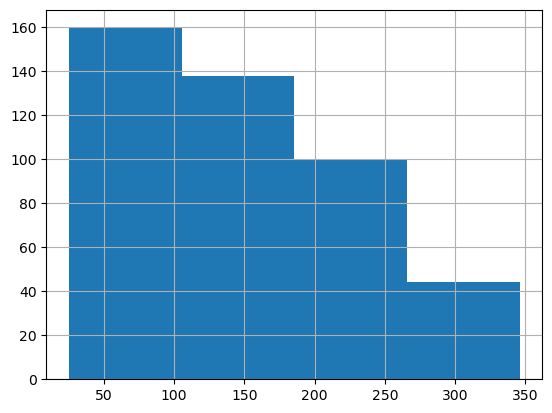

In [18]:
# Create a histagram of the target values in 4 bins
diabetes["target"].hist(bins = 4)

### 4. Categorize the target values into 4 groups

* Add a new attribute "y_cat" to the diabetes dataframe.
* "y_cat" should be:
    * 1 if target is between 0 and 90
    * 2 if target is between 90 and 180
    * 3 if target is between 180 and 270
    * 4 if target is over 270
* Hint: use pd.cut()

In [23]:
#Add an attribute called "y_cat" and bin the attribute 
diabetes["y_cat"] = pd.cut(diabetes["target"],
                               bins=[0, 90, 180, 270, np.inf],
                               labels=[1, 2, 3, 4])

### 5. Compute the percentage of values in each y_cat

* Write one line of code to compute the percentage of values in each y_cat.
* Your results should match the ones below (exactly).

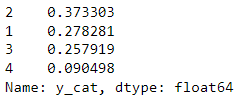


In [46]:
#Computw the percentages of the values in the y_cat
diabetes["y_cat"].value_counts()/ len(diabetes)

2    0.373303
1    0.278281
3    0.257919
4    0.090498
Name: y_cat, dtype: float64

### 6. Create a stratified training and testing set

* Use StratifiedShuffleSplit to create diabetes_strat_train_set and diabetes_strat_test_set
    * Assume an 80% training / 20% testing split
    * Stratify based on y_cat

In [47]:
# Creating a stratified testing and training set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(diabetes, diabetes["y_cat"]):
    strat_train_set = diabetes.loc[train_index]
    strat_test_set = diabetes.loc[test_index]


### 7. Check the distribution of your test set

* Write one line of code to check the distribution of your test set.
* It should look similar to the overall distribution.
* For example, my test set distribution was:

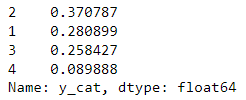


In [48]:
#Checkinf the distribution of the testing set
strat_test_set["y_cat"].value_counts() / len(strat_test_set)

2    0.370787
1    0.280899
3    0.258427
4    0.089888
Name: y_cat, dtype: float64

## End of Exercise M2.1

-------------------------------------